<a href="https://colab.research.google.com/github/TheClockworkk/ML-Labs-Homeworks-2th-Semester/blob/main/Lab1/lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall matplotlib -y
!pip install matplotlib==3.4.2

Found existing installation: matplotlib 3.4.2
Uninstalling matplotlib-3.4.2:
  Successfully uninstalled matplotlib-3.4.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.4.2-cp310-cp310-linux_x86_64.whl
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mizani 0.8.1 requires matplotlib>=3.5.0, but you have matplotlib 3.4.2 which is incompatible.
plotnine 0.10.1 requires matplotlib>=3.5.0, but you have matplotlib 3.4.2 which is incompatible.


In [4]:
import matplotlib
print(matplotlib.__version__)

3.4.2


In [5]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm

from scipy.special import softmax
from scipy.spatial.distance import cdist
import numpy as np
import torch

from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, ParameterGrid
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from mlxtend.plotting import plot_decision_regions


Задание 1
Создаём Датасет

In [6]:
X, Y = make_classification(n_samples=250, n_features=3, 
                           n_informative=3, n_classes=5, 
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=0)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=50, 
                                                    random_state=0)

Запускаем Метод ближайшего соседа

In [7]:
model = KNeighborsClassifier(n_neighbors=1)
_ = model.fit(X_train, Y_train)

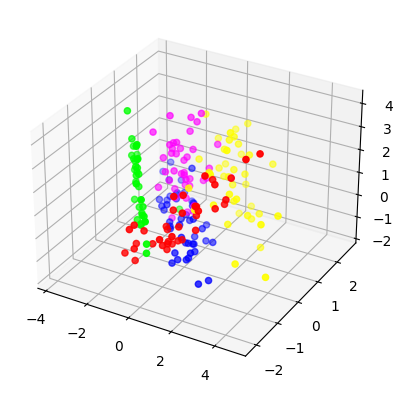

In [8]:
N = 250
colors = [np.array([1, 0, 0]).reshape(1,-1),np.array([0, 1, 0]).reshape(1,-1),np.array([0, 0, 1]).reshape(1,-1),
np.array([1, 1, 0]).reshape(1,-1),np.array([1, 0, 1]).reshape(1,-1),] # распределение цветов по классам
c = [colors[i] for i in Y_train[:N]] # распределение цветов по классам
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:N,0], X_train[:N,1], X_train[:N,2], c=c) # изображаем классификацию
plt.show()

Запускаем Ядерное взвешивание Окном Парзена

In [9]:
def K(distance, h=0.05):
    ret = np.array(distance)/h
    return (1 - ret**2) * (np.abs(ret) <= 1)

model1 = KNeighborsClassifier(n_neighbors=len(X_train),
                                 weights=lambda x: K(x, h=h)) # обучение с коэфициентом 0.05
model1.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=200,
                     weights=<function <lambda> at 0x7f7c392a7a30>)

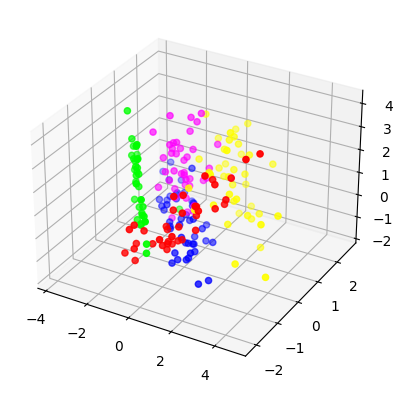

In [10]:
N = 250
colors = [np.array([1, 0, 0]).reshape(1,-1),np.array([0, 1, 0]).reshape(1,-1),np.array([0, 0, 1]).reshape(1,-1),
np.array([1, 1, 0]).reshape(1,-1),np.array([1, 0, 1]).reshape(1,-1),] # распределение цветов по классам
c = [colors[i] for i in Y_train[:N]]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:N,0], X_train[:N,1], X_train[:N,2], c=c)

#for i, h in enumerate([0.05, 0.1, 0.2, 0.5]):
#    model = KNeighborsClassifier(n_neighbors=len(X_train),
#                                 weights=lambda x: K(x, h=h))
#    model.fit(X_train, Y_train)
#    ax.append(fig.add_subplot(gs[i]))
#    plot_decision_regions(X_test, Y_test, model, ax=ax[i])

plt.show()

In [11]:
model2 = KNeighborsClassifier(n_neighbors=len(X_train),
                                 weights=lambda x: K(x, h=0.5)) # обучение с коэфициентом 0.5
model2.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=200,
                     weights=<function <lambda> at 0x7f7c392dfeb0>)

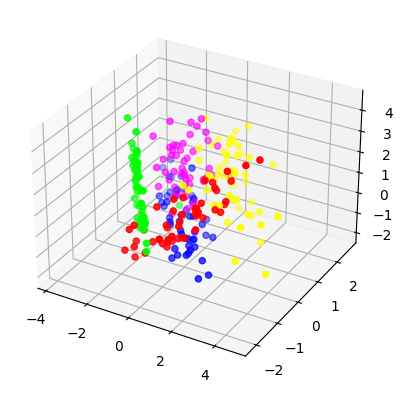

In [12]:
N = 250
colors = [np.array([1, 0, 0]).reshape(1,-1),np.array([0, 1, 0]).reshape(1,-1),np.array([0, 0, 1]).reshape(1,-1),
np.array([1, 1, 0]).reshape(1,-1),np.array([1, 0, 1]).reshape(1,-1),] # распределение цветов по классам
c = [colors[i] for i in Y[:N]]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=c)

#for i, h in enumerate([0.05, 0.1, 0.2, 0.5]):
#    model = KNeighborsClassifier(n_neighbors=len(X_train),
#                                 weights=lambda x: K(x, h=h))
#    model.fit(X_train, Y_train)
#    ax.append(fig.add_subplot(gs[i]))
#    plot_decision_regions(X_test, Y_test, model, ax=ax[i])

plt.show()

Запускаем Алгоритм отбора эталонных объектов

In [13]:
def scores(self, X):
        features = self.gams*self.kernel(cdist(X, self.X))
        #print(self.kernel(cdist(X, self.X)))
        scores = np.vstack(
            [np.sum(features.T[np.where(self.Y==0)[0]].T, axis=-1),
             np.sum(features.T[np.where(self.Y==1)[0]].T, axis=-1)]).T
        return scores

In [14]:
neighbours_0, neighbours_1, neighbours_2, neighbours_3, neighbours_4 = [], [], [], [], []
# Разделим элементы по классам
for i in range(200):
    if Y_train[i] == 0:
        neighbours_0 = np.append(neighbours_0, X_train[i])
    elif Y_train[i] == 1:
        neighbours_1 = np.append(neighbours_1, X_train[i])
    elif Y_train[i] == 2:
        neighbours_2 = np.append(neighbours_2, X_train[i])
    elif Y_train[i] == 3:
        neighbours_3 = np.append(neighbours_3, X_train[i])
    else:
        neighbours_4 = np.append(neighbours_4, X_train[i])
        
        
neighbours_0 = np.reshape(neighbours_0, (-1,3))
neighbours_1 = np.reshape(neighbours_1, (-1,3)) 
neighbours_2 = np.reshape(neighbours_2, (-1,3)) 
neighbours_3 = np.reshape(neighbours_3, (-1,3)) 
neighbours_4 = np.reshape(neighbours_4, (-1,3)) 

In [15]:
neigh = NearestNeighbors(n_neighbors=10)
neigh.fit(neighbours_0)

#for i in range(len(neighbours_0)):
#    print(neigh.kneighbors([X_train[i]]))

ed_sums_0 = np.zeros(len(neighbours_0))
for i in range(len(neighbours_0)):
    ed_sums_0[i] = np.sum(neigh.kneighbors([neighbours_0[i]])[0]) # суммы евклидовых расстояний
print("Sums of distances [CLASS 0]: \n", ed_sums_0)
np.sort(ed_sums_0) # Сортируем по минимуму
print("SORTED Sums of distances [CLASS 0]: \n",ed_sums_0)
eds_indices_0 = np.argsort(ed_sums_0) # Индексы отсортированного массива
print("INDICES OF SORTED Sums of distances [CLASS 0]: \n", eds_indices_0)

Sums of distances [CLASS 0]: 
 [ 8.07247138  6.7158566   7.08195233 10.19346401  5.24872053  8.23634176
  8.50122467  9.47195821 10.36471954  9.19283838  5.09638817  4.39897295
 16.99676992  9.21069843  5.27127774  8.68978943  9.17155087  5.85857199
  3.37522599  4.22374542  7.94919731  6.46891779  9.37502719  6.15692665
  8.92049193  6.49958785 19.48832024  4.20425934  3.47989473  6.65569447
  7.19324299  5.39323075  8.2538363   7.33984604  7.71369377  7.43894117
  6.11464654  7.51716715]
SORTED Sums of distances [CLASS 0]: 
 [ 8.07247138  6.7158566   7.08195233 10.19346401  5.24872053  8.23634176
  8.50122467  9.47195821 10.36471954  9.19283838  5.09638817  4.39897295
 16.99676992  9.21069843  5.27127774  8.68978943  9.17155087  5.85857199
  3.37522599  4.22374542  7.94919731  6.46891779  9.37502719  6.15692665
  8.92049193  6.49958785 19.48832024  4.20425934  3.47989473  6.65569447
  7.19324299  5.39323075  8.2538363   7.33984604  7.71369377  7.43894117
  6.11464654  7.51716715]
IND

In [16]:
neigh.fit(neighbours_1)

#for i in range(len(neighbours_1)):
#    print(neigh.kneighbors([X_train[i]]))

ed_sums_1 = np.zeros(len(neighbours_1))
for i in range(len(neighbours_1)):
    ed_sums_1[i] = np.sum(neigh.kneighbors([neighbours_1[i]])[0]) # суммы евклидовых расстояний
print("Sums of distances [CLASS 1]: \n", ed_sums_1)
np.sort(ed_sums_1) # Сортируем по минимуму
print("SORTED Sums of distances [CLASS 1]: \n",ed_sums_1)
eds_indices_1 = np.argsort(ed_sums_1) # Индексы отсортированного массива
print("INDICES OF SORTED Sums of distances [CLASS 1]: \n", eds_indices_1)

Sums of distances [CLASS 1]: 
 [ 8.24497593 16.91376276 12.59104708  9.77380015  6.61891429  9.44348329
  6.14683299  9.8557578   6.47629612  6.74387157 12.74476864 11.33389823
  9.29720687  8.49222893  7.19936866  7.08037102  8.41933331  7.96628638
  9.04691281  9.90165973 13.76423423 21.71155179 13.20089401  7.55499391
  8.19043634 13.95823967 13.61721625  6.86771523  7.84649905 10.92352804
  5.77083665 10.42787177  8.48094123  5.99678574]
SORTED Sums of distances [CLASS 1]: 
 [ 8.24497593 16.91376276 12.59104708  9.77380015  6.61891429  9.44348329
  6.14683299  9.8557578   6.47629612  6.74387157 12.74476864 11.33389823
  9.29720687  8.49222893  7.19936866  7.08037102  8.41933331  7.96628638
  9.04691281  9.90165973 13.76423423 21.71155179 13.20089401  7.55499391
  8.19043634 13.95823967 13.61721625  6.86771523  7.84649905 10.92352804
  5.77083665 10.42787177  8.48094123  5.99678574]
INDICES OF SORTED Sums of distances [CLASS 1]: 
 [30 33  6  8  4  9 27 15 14 23 28 17 24  0 16 32 13 

In [17]:
neigh.fit(neighbours_2)

#for i in range(len(neighbours_2)):
#    print(neigh.kneighbors([X_train[i]]))

ed_sums_2 = np.zeros(len(neighbours_2))
for i in range(len(neighbours_2)):
    ed_sums_2[i] = np.sum(neigh.kneighbors([neighbours_2[i]])[0]) # суммы евклидовых расстояний
print("Sums of distances [CLASS 2]: \n", ed_sums_2)
np.sort(ed_sums_2) # Сортируем по минимуму
print("SORTED Sums of distances [CLASS 2]: \n",ed_sums_2)
eds_indices_2 = np.argsort(ed_sums_2) # Индексы отсортированного массива
print("INDICES OF SORTED Sums of distances [CLASS 2]: \n", eds_indices_2)

Sums of distances [CLASS 2]: 
 [ 5.84455242  6.30364122  4.96983311  9.20402226  5.69473877  5.6279219
  6.76166799  5.66028286 15.60706714  4.7393566   5.9935317   6.73779279
  5.40895806  5.82012086  6.23870782  5.21517621  7.16813545  6.01117828
  4.80242583  5.1854851   5.14395837  5.43617876  6.14667517  6.10277311
  7.69698565 11.80818877  7.7766713   5.88937622  5.00015263  7.25804182
  4.77418439 11.22816773  4.70687125  6.21264174  5.68702167  6.98735775
  6.79809999 12.87243615  5.13767574 14.2162638   6.07467697  7.6219536
  5.70646878 10.21379586 12.33824991  7.77897573]
SORTED Sums of distances [CLASS 2]: 
 [ 5.84455242  6.30364122  4.96983311  9.20402226  5.69473877  5.6279219
  6.76166799  5.66028286 15.60706714  4.7393566   5.9935317   6.73779279
  5.40895806  5.82012086  6.23870782  5.21517621  7.16813545  6.01117828
  4.80242583  5.1854851   5.14395837  5.43617876  6.14667517  6.10277311
  7.69698565 11.80818877  7.7766713   5.88937622  5.00015263  7.25804182
  4.7741

In [18]:
neigh.fit(neighbours_3)

#for i in range(len(neighbours_3)):
#    print(neigh.kneighbors([X_train[i]]))

ed_sums_3 = np.zeros(len(neighbours_3))
for i in range(len(neighbours_3)):
    ed_sums_3[i] = np.sum(neigh.kneighbors([neighbours_3[i]])[0]) # суммы евклидовых расстояний
print("Sums of distances [CLASS 3]: \n", ed_sums_3)
np.sort(ed_sums_3) # Сортируем по минимуму
print("SORTED Sums of distances [CLASS 3]: \n",ed_sums_3)
eds_indices_3 = np.argsort(ed_sums_3) # Индексы отсортированного массива
print("INDICES OF SORTED Sums of distances [CLASS 3]: \n", eds_indices_3)

Sums of distances [CLASS 3]: 
 [ 9.02246029 10.08380346  9.97999149 13.34276356 12.168744    9.86095954
 10.89095841  8.86101796  8.02332604 12.15425884 11.72989572 24.1971393
 18.61149633 16.98687319 12.51646585 12.33671705  8.94524593  9.96371952
 11.16296456 12.56575055 16.07674717  9.8600749   9.22272787  8.77854772
 10.28606835 14.23986204 13.38181741 15.33695974  8.95384123  9.58806482
  9.59917849  8.20066035 16.7728807   9.31979446  8.50312539 10.94535409
 17.86876972  9.4082892  11.50399714 11.04277807 17.69316975]
SORTED Sums of distances [CLASS 3]: 
 [ 9.02246029 10.08380346  9.97999149 13.34276356 12.168744    9.86095954
 10.89095841  8.86101796  8.02332604 12.15425884 11.72989572 24.1971393
 18.61149633 16.98687319 12.51646585 12.33671705  8.94524593  9.96371952
 11.16296456 12.56575055 16.07674717  9.8600749   9.22272787  8.77854772
 10.28606835 14.23986204 13.38181741 15.33695974  8.95384123  9.58806482
  9.59917849  8.20066035 16.7728807   9.31979446  8.50312539 10.9453

In [19]:
neigh.fit(neighbours_4)

#for i in range(len(neighbours_4)):
#    print(neigh.kneighbors([X_train[i]]))

ed_sums_4 = np.zeros(len(neighbours_4))
for i in range(len(neighbours_4)):
    ed_sums_4[i] = np.sum(neigh.kneighbors([neighbours_4[i]])[0]) # суммы евклидовых расстояний
print("Sums of distances [CLASS 4]: \n", ed_sums_4)
np.sort(ed_sums_4) # Сортируем по минимуму
print("SORTED Sums of distances [CLASS 4]: \n",ed_sums_4)
eds_indices_4 = np.argsort(ed_sums_4) # Индексы отсортированного массива
print("INDICES OF SORTED Sums of distances [CLASS 4]: \n", eds_indices_4)

Sums of distances [CLASS 4]: 
 [ 5.21130119  4.91959116  5.5841144   6.36218606 10.4802663  10.64201524
 11.81109068  3.86385253  7.2936506   4.12723071  3.98574472  6.9143348
  7.72465158  4.65297938 10.12181103  5.81584302  3.79516407  4.28639713
  6.62434443  4.86118632  5.81280014  6.73257278  8.53547555  4.01043644
  7.26866668  5.1386153   4.30933584  9.97229434  4.59464507  3.65872974
  7.04171041  8.33359507  4.89954722  4.17622107  6.03857075  5.36599313
  5.51070394  4.22709768  4.1334929  12.45024491  4.5411195 ]
SORTED Sums of distances [CLASS 4]: 
 [ 5.21130119  4.91959116  5.5841144   6.36218606 10.4802663  10.64201524
 11.81109068  3.86385253  7.2936506   4.12723071  3.98574472  6.9143348
  7.72465158  4.65297938 10.12181103  5.81584302  3.79516407  4.28639713
  6.62434443  4.86118632  5.81280014  6.73257278  8.53547555  4.01043644
  7.26866668  5.1386153   4.30933584  9.97229434  4.59464507  3.65872974
  7.04171041  8.33359507  4.89954722  4.17622107  6.03857075  5.3659

In [20]:
REFS = []
REFS_DIST = []

for i in range(5):
    REFS = np.append(REFS, neighbours_0[eds_indices_0[i]])
for i in range(5):    
    REFS = np.append(REFS, neighbours_1[eds_indices_1[i]])
for i in range(5):
    REFS = np.append(REFS, neighbours_2[eds_indices_2[i]])
for i in range(5):
    REFS = np.append(REFS, neighbours_3[eds_indices_3[i]])
for i in range(5):
    REFS = np.append(REFS, neighbours_4[eds_indices_4[i]])
    
REFS = np.reshape(REFS, (-1, 3))
    
for i in range(5):
    REFS_DIST = np.append(REFS_DIST, ed_sums_0[i])
    REFS_DIST = np.append(REFS_DIST, ed_sums_1[i])
    REFS_DIST = np.append(REFS_DIST, ed_sums_2[i])
    REFS_DIST = np.append(REFS_DIST, ed_sums_3[i])
    REFS_DIST = np.append(REFS_DIST, ed_sums_4[i])
    
REFS_DIST = np.reshape(REFS, (-1, 5))

Y_REFS = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4]
    
REFS, REFS_DIST, Y_REFS

(array([[ 0.34104811, -1.03501071, -0.04904284],
        [ 0.31436681, -1.04445448, -0.14134127],
        [ 0.3667774 , -0.88916284, -0.2708139 ],
        [ 0.407828  , -1.15861701, -0.26812702],
        [ 0.62991956, -0.8736424 , -0.07270525],
        [-1.76476056, -0.41907262,  2.07905311],
        [-1.79329292, -0.44629976,  1.76479676],
        [-2.21672763, -0.16661934,  2.15814555],
        [-2.46678396,  0.11521792,  1.76891622],
        [-2.1253207 , -0.112863  ,  1.57170561],
        [ 0.43272205, -0.01292869, -1.01478397],
        [ 0.07976373,  0.11338521, -1.19395229],
        [ 0.28869086, -0.57118702, -1.26998034],
        [ 0.5959982 , -0.37017223, -1.2895821 ],
        [ 0.60240628, -0.08159885, -1.25108568],
        [ 1.11534395,  1.2461787 ,  1.41813996],
        [ 1.02839399,  1.07324668,  1.219697  ],
        [ 1.38254945,  1.51717233,  1.07295778],
        [ 1.63675019,  0.72984236,  0.59036134],
        [ 0.24367164,  1.64657081,  0.57475796],
        [-1.40464086

In [21]:
# Отделим вершины от эталонных
NOT_REFS = X
NOT_REFS = np.delete(NOT_REFS, np.where(np.in1d(X, REFS)))
NOT_REFS = np.reshape(NOT_REFS, (-1, 3))
print(len(NOT_REFS))

225


In [22]:
Y_NOT_REFS = Y
Y_NOT_REFS = np.delete(Y_NOT_REFS, np.where(np.in1d(X[:,0], REFS[:,0])))
print(len(Y_NOT_REFS))

225


In [23]:
def K(distance, h=0.2):
    ret = np.array(distance)/h
    return (1 - ret**2) * (np.abs(ret) <= 1)

In [24]:
model = KNeighborsClassifier(n_neighbors=len(REFS),
                                 weights=lambda x: K(x, h=h))
model.fit(REFS, Y_REFS)

KNeighborsClassifier(n_neighbors=25,
                     weights=<function <lambda> at 0x7f7c3797bac0>)

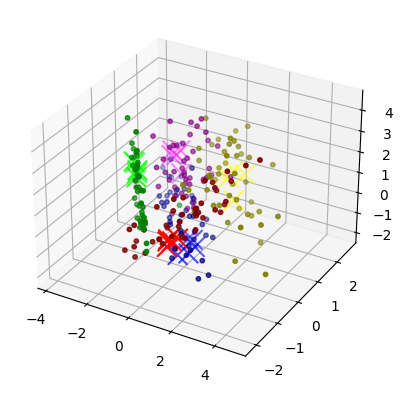

In [25]:
N = 250
colors = [np.array([1, 0, 0]).reshape(1,-1),np.array([0, 1, 0]).reshape(1,-1),np.array([0, 0, 1]).reshape(1,-1),
np.array([1, 1, 0]).reshape(1,-1),np.array([1, 0, 1]).reshape(1,-1),] # распределение цветов по классам
c = [colors[i]/2 for i in Y_NOT_REFS[:N]]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(NOT_REFS[:,0], NOT_REFS[:,1], NOT_REFS[:,2], c=c, s=10)
c = [colors[i] for i in Y_REFS[:N]]
ax.scatter(REFS[:,0], REFS[:,1], REFS[:,2], c=c, s=200, marker='x')

Задание 3


Проведём оптимизацию по ширине окна

In [26]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import optuna

def objective(trial):
    h_opt = trial.suggest_float("h_opt", 0.01, 100, log=True)
    model3 = KNeighborsClassifier(n_neighbors=len(X_train),
                                 weights=lambda x: K(x, h=h_opt)) # обучение с коэфициентом h
    model3.fit(X_train, Y_train)
    return 1 / model3.score(X_test, Y_test, sample_weight=None)

optuna.logging.disable_default_handler() #Отключить логирование
study = optuna.create_study()
study.optimize(objective, n_trials=400)

best_params = study.best_params
found_h_opt = best_params["h_opt"]
model3 = KNeighborsClassifier(n_neighbors=len(X_train),
                                 weights=lambda x: K(x, h=found_h_opt)) # обучение с коэфициентом h
model3.fit(X_train, Y_train)
print("Найденная ширина окна h: {:0.3f}, Точность при данной ширине окна: {:0.3f}".format(found_h_opt, model3.score(X_test, Y_test, sample_weight=None)))

Найденная ширина окна h: 0.975, Точность при данной ширине окна: 0.860


Задание 4<br>
Подключим датасет с картинками (FashionMnist)<br>
содержит 10 классов и 70000 изображений типов одежды

In [28]:
# Import Pandas for data manipulation using dataframes
import pandas as pd

In [29]:
import os
print(os.listdir("./FashionMNIST"))

['t10k-images-idx3-ubyte', 'fashion-mnist_test.csv', 't10k-labels-idx1-ubyte', 'train-images-idx3-ubyte', 'fashion-mnist_train.csv', 'train-labels-idx1-ubyte']


Чтение датасета

In [30]:
test_data = pd.read_csv('./FashionMNIST/fashion-mnist_train.csv', header = None)

<ipython-input-30-38b9ddbf456e>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,

In [31]:
labels = test_data.iloc[1:, 0]
images = test_data.iloc[1:, 1:]

label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
         'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [32]:
X_train, X_dev, y_train, y_dev = train_test_split(images, labels, test_size=0.01)
print(X_train.shape, X_dev.shape, y_train.shape, y_dev.shape)

(59400, 784) (600, 784) (59400,) (600,)


Масштабирование и нормализация

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

X_train_standardized = StandardScaler().fit_transform(X_train)
X_dev_standardized = StandardScaler().fit_transform(X_dev)


In [34]:
X_train_normalized = Normalizer().fit_transform(X_train_standardized)
X_dev_normalized = Normalizer().fit_transform(X_dev_standardized)

Эмбеддинг на t-SNE

In [35]:
from sklearn.manifold import TSNE
#X_train_embeded = TSNE(n_components=2).fit_transform(X_train_normalized)
X_dev_tsne = TSNE(n_components=2).fit_transform(X_dev_normalized)

Визуализация

<ipython-input-36-004b8497ef72>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.imshow(X_dev.values.astype(np.int)[num].reshape(28,28), cmap=plt.cm.binary)


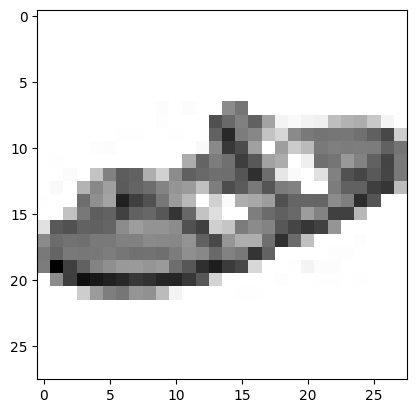

In [36]:
num = 10 
plt.imshow(X_dev.values.astype(np.int)[num].reshape(28,28), cmap=plt.cm.binary)

<ipython-input-37-e7b1cb0ba016>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  for k, i in enumerate(np.unique(y.astype(np.int))):


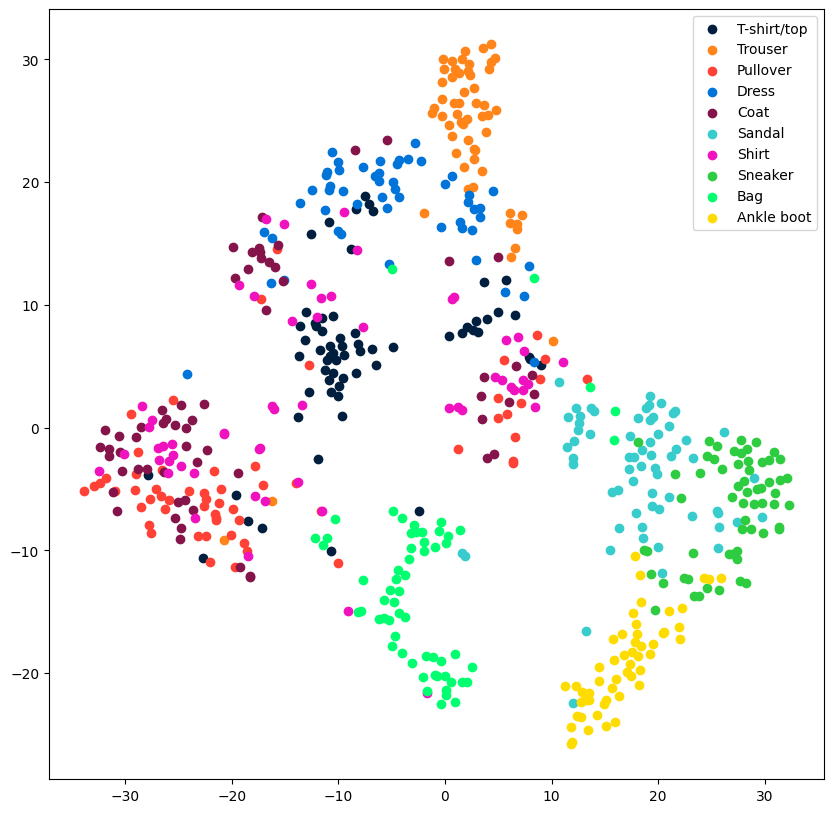

In [37]:
import numpy as np
from ast import literal_eval

colors = ['rgb(0,31,63)', 'rgb(255,133,27)', 'rgb(255,65,54)', 'rgb(0,116,217)', 'rgb(133,20,75)', 'rgb(57,204,204)',
'rgb(240,18,190)', 'rgb(46,204,64)', 'rgb(1,255,112)', 'rgb(255,220,0)',
'rgb(76,114,176)', 'rgb(85,168,104)', 'rgb(129,114,178)', 'rgb(100,181,205)']

def plot_embedding_v1(X_embeded, y):
    plt.rcParams["figure.figsize"] = [10,10]
    for k, i in enumerate(np.unique(y.astype(np.int))):
        plt.scatter(X_embeded[y == i, 0],
                   X_embeded[y == i, 1],
                   color = '#%02x%02x%02x' % literal_eval(colors[k][3:]), 
                    label = label_names[k])
    plt.legend()
    plt.show()

plot_embedding_v1(X_dev_tsne, y_dev)

In [38]:
y_dev_array=y_dev.iloc[0:].values.astype('int')

In [39]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_dev_tsne, y_dev_array)

KNeighborsClassifier(n_neighbors=1)

In [40]:
#!pip install -U mlxtend

In [41]:
#from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


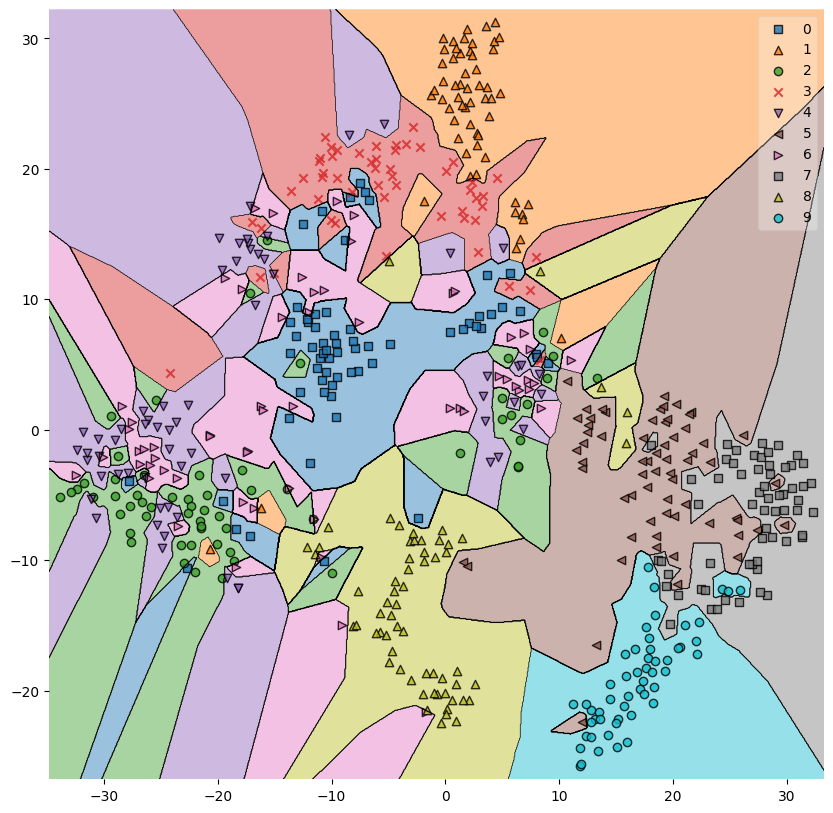

In [42]:
fig = plt.figure(figsize=(10,10))
plot_decision_regions(X_dev_tsne, y_dev_array, model)
#plt.xlim(X_dev_tsne[:,0].min()-1, X_dev_tsne[:,0].max()+1)
#plt.ylim(X_dev_tsne[:,1].min()-1, X_dev_tsne[:,1].max()+1)
plt.show()